In [1]:
import numpy as np
import numpy.matlib
import seaborn as sns
import matplotlib.pyplot as plt
import math
import time
from sklearn.linear_model import Ridge
from random import randint
import pandas as pd


In [2]:
from keras.datasets import mnist

Given code
-----------


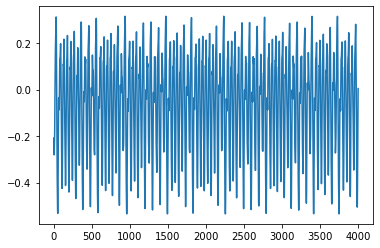

In [3]:

# check for intuition at  http://users.fs.cvut.cz/ivo.bukovsky/PVVR/prace_studentu/Mackey_Glass_time_series_prediction_Fuzzy_Lookup.pdf

def mackey_glass(tau, length):
    betta=0.2
    gamma = 0.1 
    a=10
    delay=100 # will cut these initial steps
    
    y=np.random.rand(tau) # random intial values between 0 and 1
    # Euler's method to solve the differential equation
    for t in range(tau-1, length+delay+tau-1):
        current= y[t] + ( betta * y[t-(tau-1)]   / ( 1 + np.power(y[t-(tau-1)], a) 
)  ) - gamma*y[t]   
        y=np.append(y, current)
    
    y=y-1 # get rid of mean
    y=np.tanh(y) # squeze with tanh    
    
    return y[tau+delay:length+delay+tau] # return the last length elements
length=4000 # duration of the series
tau=17 # delay in the equation
y=mackey_glass(tau, length)
#plot generated time-series
plt.plot(y)
plt.show()

Part 1 & 2:
-------------
Download the dataset at 
https://www.cs.ucr.edu/%7Eeamonn/time_series_data_2018/
2. You will have separate training and testing datasets.

In [4]:
swed_train = pd.read_csv('SwedishLeaf/SwedishLeaf_Train.tsv', delimiter='\t')
train_Data = swed_train.values
swed_test = pd.read_csv('SwedishLeaf/SwedishLeaf_Test.tsv', delimiter='\t')
test_Data = swed_test.values

Part 3:
---------
Fix the reservoir size to Nx = 800 neurons.

In [5]:
reservoirSize = 800

Part 4:
---------
Generate input weight matrix Win from uniform distribution between -1 
and 1. Scale Win by 0.25

In [6]:
scale = 0.25
min_weight = -1
max_weight = 1


Part 5:
---------


In [7]:
bias = 1

Part 6:
-----------
 Set the spectral radius (feedback strength) for the reservoir connection 
matrix to ρ = 0.99. 

Part 7-15:
---------


In [9]:
def tanh(x):
    return np.tanh(x).real

In [10]:
print(train_Data[0][0])

11.0


In [54]:
def training(training_set):
    
    W_in = np.random.uniform(min_weight,max_weight,(reservoirSize,2))*scale
    W_out = np.random.uniform(min_weight,max_weight,((reservoirSize+1+1),15))
    W_back = np.random.uniform(min_weight,max_weight,(reservoirSize,15))

    #Train network
    y = np.zeros(15) # there is 15 classes in the dataset
    X = []
    Y = []
    correct = 0
    for part in range(0,len(training_set, W_res)):
        x = np.zeros(reservoirSize) # For each signal in the training dataset: initialize the reservoir to zero and feed-in the signal to the ESN
        label_value = training_set[part][0]
        label =np.zeros(len(y))
        label[int(label_value)-1] = 1
        prediction = []

        for n in range(1,len(training_set[part])):
            #Varmstart
            u = np.array([bias,training_set[part][n]])

            part1 = np.dot(W_res, x)
            part2 = np.dot(W_in,u)

            x = tanh(part1 + part2)
            conc = np.concatenate([u, x])


            y = conc@W_out
            prediction.append(np.argmax(y)) #Use the highest value among the predictions as the predicted class

            X.append(conc)
            Y.append(label)
        overall = np.bincount(prediction)

        if (np.argmax(label) == np.argmax(overall)):
            correct += 1
        
        l= 1.0
        x_f = np.array(X)
        y_f = np.array(Y)
        W_out = np.linalg.pinv(np.transpose(x_f)@x_f + l*np.diag(np.var(x_f, axis=0)))@np.transpose(x_f)@y_f
    print(part+1)
    print(correct)
    print("% = ", correct / (part+1))
    return x, y,W_out, W_back, W_in


def ESN(test_set, W_out, W_back, W_in, W_res):

    y = np.zeros(15)
    correct = 0
    for part in range(0,len(test_set)):
        x = np.zeros(reservoirSize) # For each signal in the training dataset: initialize the reservoir to zero and feed-in the signal to the ESN
        label_value = test_set[part][0]
        label =np.zeros(len(y))
        label[int(label_value)-1] = 1
        prediction = []

        for n in range(1,len(test_set[part])):
            #Varmstart
            u = np.array([bias,test_set[part][n]])

            part1 = np.dot(W_res, x)
            part2 = np.dot(W_in,u)

            x = tanh(part1 + part2)
            conc = np.concatenate([u, x])


            y = conc@W_out
            prediction.append(np.argmax(y)) #Use the highest value among the predictions as the predicted class

         
        overall = np.bincount(prediction)

        if (np.argmax(label) == np.argmax(overall)):
            correct += 1


    total = part +1
    return correct, total

total_tot = 0
correct_tot = 0
all_procents = []
for i in range(3):
    W_res = np.random.uniform(min_weight,max_weight,(reservoirSize,reservoirSize))*scale
    spectralRadius  = 0.99
    eg_val1 = np.abs(np.linalg.eigvals(W_res))
    W_res = W_res/(max(eg_val1))*spectralRadius

    x, y, output, W_back, W_in = training(train_Data, W_res)
    correct, total = ESN(test_Data, output,W_back, W_in,W_res)
    total_tot += total
    correct_tot += correct
    all_procents.append(correct/total)
    #y_tot.append(y_test_tot)
    #error_tot.append(error_test_tot)

print(correct/total)
print(all_procents)
print(np.mean(all_procents))



499
276
% =  0.5531062124248497
499
276
% =  0.5531062124248497
499
276
% =  0.5531062124248497
0.7227564102564102
[0.7227564102564102, 0.7227564102564102, 0.7227564102564102]
0.7227564102564102


In [22]:
def train(tr_set):
    weight_out = np.random.uniform(-1,1,((reservoirSize+1+1),15))
    weight_back = np.random.uniform(-1,1,(reservoirSize,15))

    #Train network
    x = np.zeros(reservoirSize)
    y = np.zeros(15)
    X = []
    Y = []
    
    totalpreds = 0
    freqCorrect = 0
    largCorrect = 0
    for part in range(0,30):
        x = np.zeros(reservoirSize)
        label_value = tr_set[part][0]
        label =np.zeros(len(y))
        label[int(label_value)-1] = 1
        prediction = []

        for n in range(1,len(tr_set[part])):
            
            u = np.array([bias,tr_set[part][n]])

            part1 = np.dot(W_res, x)
            part2 = np.dot(W_in,u)

            x = tanh(part1 + part2)
            conc = np.concatenate([u, x])

            y = conc@weight_out
            prediction.append(np.argmax(y))

            X.append(conc)
            Y.append(label)


            
        #Accuracy
        totalpreds += 1
        bin = np.bincount(prediction)
        print(bin)
        #Most frequent
        if(np.argmax(bin) == np.argmax(label)):
            freqCorrect += 1
            
        #Last value
        if(np.argmax(y) == np.argmax(label)):
            largCorrect += 1
        print("\r Epoch {} out of {} with accuracy {}".format(i,len(tr_set)-1,freqCorrect/totalpreds), end="\r")

        l= 1.0
        x_f = np.array(X)
        y_f = np.array(Y)
        weight_out = np.linalg.pinv(np.transpose(x_f)@x_f + l*np.diag(np.var(x_f, axis=0)))@np.transpose(x_f)@y_f
        
    print("Training accuracy (frequencey)", freqCorrect/totalpreds)
    print("Training accuracy (Last Y)", largCorrect/totalpreds)
    return x, y, weight_out, weight_back

In [13]:
x, y, weight_out, weight_back = train(train_Data)


[ 0 53 19  0  0  0 53  1  0  0  0  0  1  0  1]
[  0   0   0   0   0   0   0   0   0   0 128]
[ 0  0  0  0  0  0  0  0  0  0 66  0 62]
[  0   0   0   5   0   0   0   0   0   0   8   0 115]
[  0   0   0   3   0   0   0   0   0   0   8   0 117]
[ 0  0  0 13  0  0  0  3  0  0 53  0 59]
[ 0  0  7 51  0  0  0 15  0  0 31  0 24]6666666666666
[ 0  0  0  3  0  0  0 68  0  0  0  0 57]5714285714285
[ 0  0  7 10  0  0  0  2  0  0 77  0 32]
[ 0  0  1  0  0  0  0 42  0  0 35  0 50]333333333333
[ 0  0  0  0  0  0  0 78  0  0  0  0 50]
[ 0  0 13  3  0  0  0 11  0  0 58  0 39  4]5454545453
[ 0  0  0  0  0  0  0 69  0  0 13  0 46]666666666667
[ 0  0  0  0  0  0  0  0 23  0 74  0 31]1538461538464
[ 0  0  0  0  0  0  0 36  4  0  0  0 88]4285714285715
[ 0  0  0  0  0  0  0  0 56  0 59  0 13]333333333333
[ 0  0  0  2  0  0  0 39 47  0 17  0  6 17]
[ 0  0  0  2  0  0  0 15 60  0 12  0 39]1764705882354
[ 0  0  0  0  0  0  0  1 73  0  5  0 49]777777777778
[ 0  0  0 24 12  0  0 26 24  0  0  0  7 35]947368421
[ 